In [1]:
import csv
import numpy as np

# Open and read a CSV file
with open('rho_ECOSTRESS_S2A.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    
    # Ignorer la première ligne (en-tête)
    next(csv_reader)
    
    # Ignorer la première colonne (en-tête)
    A = np.array([[float(value) for value in row[1:]]  for row in csv_reader])
#print(A)


In [2]:
# Rajout des csts


A_ = A * [1.55677912,
 0.82798955,
 0.46914547]

T_8 = np.array([[0.371, 0.362,0.268 ],[0.174,0.587, 0.240],[-0.043,-0.427, 1.463]])

In [3]:
B = A_ @ T_8.T
B_ = A_ @ T_8.T


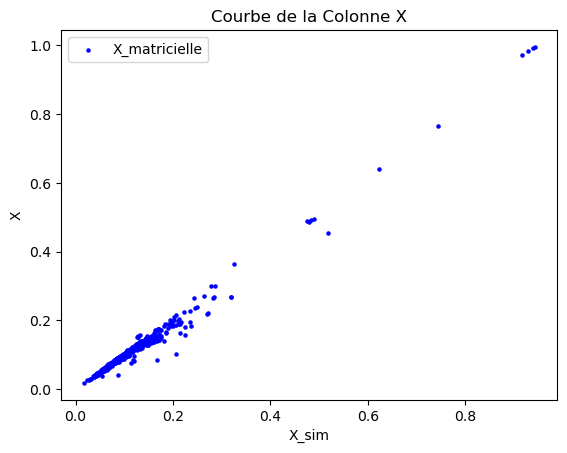

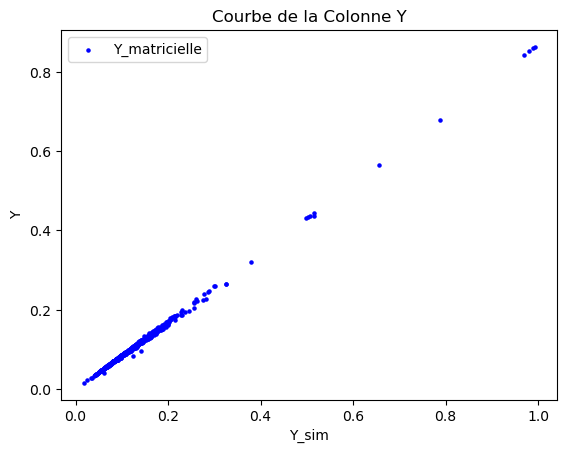

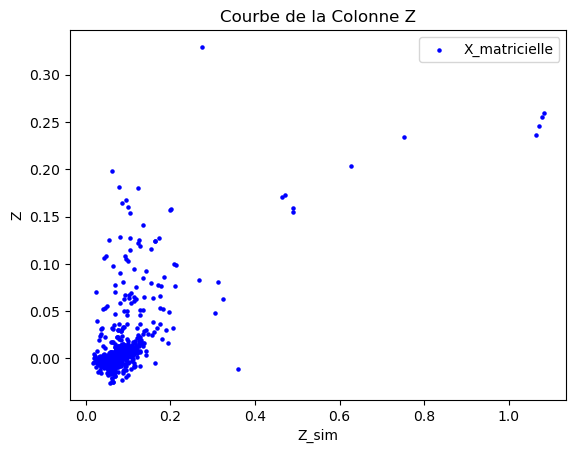

In [4]:
#Tracer les graphes
import matplotlib.pyplot as plt

# Open and read a CSV file
with open('xyz_ECOSTRESS.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Ignorer la première ligne (en-tête)
    next(csv_reader)
    
    # Ignorer la première colonne (en-tête)
    XYZ = np.array([[float(value) for value in row[1:]]  for row in csv_reader])

    

# Extraire les trois colonnes sans cst
X = B[:, 0]  # Première colonne
Y = B[:, 1]  # Deuxième colonne
Z = B[:, 2]  # Troisième colonne

# Extraire les trois colonnes avec les cst
X_ = B_[:, 0]  # Première colonne
Y_ = B_[:, 1]  # Deuxième colonne
Z_ = B_[:, 2]  # Troisième colonne

X_sim = XYZ[:,0]
Y_sim = XYZ[:,1]
Z_sim = XYZ[:,2]

x = np.linspace(0, 10, len(B))

# Effectuer une régression linéaire
X_coefficients_sim = np.polyfit(x, X_sim, 1)  # Degré 1 pour une droite
X_fit_sim = np.polyval(X_coefficients_sim, x) 

Y_coefficients_sim = np.polyfit(x, Y_sim, 1)  # Degré 1 pour une droite
Y_fit_sim = np.polyval(Y_coefficients_sim, x) 

Z_coefficients_sim = np.polyfit(x, Z_sim, 1)  # Degré 1 pour une droite
Z_fit_sim = np.polyval(Z_coefficients_sim, x) 


# Fenêtre pour la première colonne
plt.figure(1)  # Créer une nouvelle figure (fenêtre)
#plt.plot(x, X_fit_sim, label='régression linéaire X_simulé', color='red')
plt.scatter(X_sim, X, label="X_matricielle", color='blue', s=5)
#plt.scatter(X_sim, label="X_simulé", color='red', s=5)
plt.xlabel('X_sim')
plt.ylabel('X')
plt.title('Courbe de la Colonne X')
plt.legend()


# Fenêtre pour la deuxième colonne
plt.figure(2)  # Créer une nouvelle figure (fenêtre)
plt.scatter(Y_sim, Y, label="Y_matricielle", color='blue', s=5)
plt.xlabel('Y_sim')
plt.ylabel('Y')
plt.title('Courbe de la Colonne Y')
plt.legend()

# Fenêtre pour la troisième colonne

plt.figure(3)  # Créer une nouvelle figure (fenêtre)
plt.scatter(Z_sim, Z, label="X_matricielle", color='blue', s=5)
plt.xlabel('Z_sim')
plt.ylabel('Z')
plt.title('Courbe de la Colonne Z')
plt.legend()






# Afficher le graphique
plt.show()





In [5]:
# Calcul de l'erreur quadratique moyenne (MSE)
mse_X = np.mean((X_sim- X)**2)
mse_Y = np.mean((Y_sim- Y)**2)
mse_Z = np.mean((Z_sim- Z)**2)

# Calcul de l'erreur quadratique moyenne (MSE) avec cst
mse_X_ = np.mean((X_sim- X_)**2)
mse_Y_ = np.mean((Y_sim- Y_)**2)
mse_Z_ = np.mean((Z_sim- Z_)**2)

# Racine carrée de l'erreur quadratique moyenne (RMSE)
rmse_X = np.sqrt(mse_X)
rmse_Y = np.sqrt(mse_Y)
rmse_Z = np.sqrt(mse_Z)
rmse_X_ = np.sqrt(mse_X_)
rmse_Y_ = np.sqrt(mse_Y_)
rmse_Z_ = np.sqrt(mse_Z_)

print(f"RMSE: {rmse_X}, {rmse_Y}, {rmse_Z}")
print(f"RMSE avec cst: {rmse_X_}, {rmse_Y_}, {rmse_Z_}")

RMSE: 0.012169175892392269, 0.024030237591715374, 0.10734904740993119
RMSE avec cst: 0.012169175892392269, 0.024030237591715374, 0.10734904740993119


In [6]:
from sklearn.metrics import r2_score
r_squared_X = r2_score(X_sim, X)
r_squared_Y = r2_score(Y_sim, Y)
r_squared_Z = r2_score(Z_sim, Z)
r_squared_X_ = r2_score(X_sim, X_)
r_squared_Y_ = r2_score(Y_sim, Y_)
r_squared_Z_ = r2_score(Z_sim, Z_)

print(f"R^2: {r_squared_X},{r_squared_Y},{r_squared_Z}")
print(f"R^2 avec cst: {r_squared_X_},{r_squared_Y_},{r_squared_Z_}")

R^2: 0.9823791720075221,0.935964456191243,-0.19987543046510692
R^2 avec cst: 0.9823791720075221,0.935964456191243,-0.19987543046510692
